# Proyectos de Procesos Estocasticos

## Procesos de Markov y Simulacion de Erdos-Renyi




### Pregunta 2: Simulando grafos de Erdös-Rényi conexos

En el modelo de Erdös-Rényi se elige un grafo aleatorio de la siguiente manera:
Se tienen \(N\) vértices, y cada arista \(\{i, j\}\) puede o no pertenecer al grafo.
Existe un parámetro \(p\) (el modelo del grafo) que corresponde a la densidad de arcos.
Para cada arista \(\{i, j\}\) se tira una moneda independiente de parámetro \(p\) y si el resultado es **CARA**, se incluye en el grafo.
Parece claro que simular uno de estos grafos es sólo cosa de lanzar monedas!

1. Crea un programa `ER(N, p)` que, dado un número \(N\) de vértices, y un parámetro \(p\), entregue una matriz de adyacencia \(M\) simétrica de tamaño \(N x N\), donde cada entrada \(M_{ij} = M_{ji}\) si \(i \neq j\) valga 1 o 0, donde la elección del valor se haga lanzando una variable Bernoulli de parámetro \(p\). Las entradas en la diagonal de la matriz (es decir, \(i = j\)) deben valer 0. Cada entrada de la matriz


## PARTE 1

In [2]:
import numpy as np
import time 


def ER(N, p):
    M = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(i + 1, N):  
            if np.random.rand() < p:  
                M[i, j] = 1  
                M[j, i] = 1  
    return M


grafo = ER(10, 0.3)

print("Matriz de adyacencia del grafo de Erdös-Rényi:")
print(grafo)








Matriz de adyacencia del grafo de Erdös-Rényi:
[[0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 0 1]
 [1 0 0 1 0 0 1 0 0 1]
 [1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 1]
 [0 0 0 1 1 0 0 0 1 0]]


In [232]:
grafo_1 = ER(100, 0.3)
print(grafo_1)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [238]:
grafo_2 = ER(1000, 0.2)

In [240]:
grafo_3 = ER(10000, 0.5)

## PARTE 2 

Pruebe su programa con N=100, N=1000 y N=10000 para distintos valores de p. Encuentre la cantidad de aristas que hay en su grafo. Para ello, escriba un programa `CantidadAristas(M)` que reciba la matriz M y entregue la cantidad de aristas dada por:

\[ 1^T * M * 1 \]

Donde \( 1 \) es un vector de unos (vertical), y \( 1^T \) es la versión transpuesta del vector. ¿Por qué motivo esta expresión da la cantidad de aristas?




In [5]:

def cuantas_aristas(M):
    N = len(M[0])
    vector = np.ones(N)
    vector_t = vector.reshape(-1, 1)

    # Calculamos la cantidad de aristas
    aristas = np.dot(vector_t.T, M)
    aristas = np.dot(aristas, vector)
    aristas = aristas / 2
    return aristas






In [6]:
def ER_2(N, p):
    
    M = ER(N, p)

    
    aristas = cuantas_aristas(M)

    return M, aristas


grafo_1, aristas_1 = ER_2(6, 1)


print("Matriz de adyacencia del grafo de Erdös-Rényi:")
print(grafo_1)
print("Cantidad de aristas en el grafo:", aristas_1)


Matriz de adyacencia del grafo de Erdös-Rényi:
[[0 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 1 1 1]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]]
Cantidad de aristas en el grafo: [15.]


## PARTE 3

Suponga ahora que queremos elegir, para valores bajos de p y N, un grafo de Erdös-Rényi que sea conexo (es decir, que de un vértice se pueda llegar por un camino a cualquier otro). ¿Cómo lo hacemos?

Una primera aproximación es elegir un grafo conexo a través de un esquema del estilo Monte Carlo, es decir, corremos ER(N,p) obteniendo grafos hasta dar con uno que se sea conexo. Esto presentará varios problemas.




Escriba un programa `EsConexo(M)` que reciba como argumento una matriz \( M \) simétrica de valores 0 y 1. El programa debe inicializar un valor \( i = 1 \) y una lista \( l \) de valores entre 1 y \( N \), que inicialmente contenga solo el valor 1. Luego, entra en un bucle en el que:

1. Se elige el valor i-ésimo de la lista \( l \). Llamémoslo \( k \).
2. Se añaden a la lista \( l \) todos los \( j \) tales que \( M_{kj} = 1 \) y que no estén ya en la lista.
3. Se actualiza \( i \) como \( i + 1 \).

El programa debe romper el bucle cuando:
- El largo de la nueva lista \( l \) sea igual a la cantidad \( N \) (en ese caso, el programa devuelve un 1).
- El valor actualizado de \( i \) sea mayor que el largo de la nueva lista \( l \) (en ese caso, el programa entrega un 0).

Este programa busca determinar si el grafo representado por la matriz \( M \) es conexo utilizando un método de exploración de nodos.

In [7]:
def Esconexo(M):
    i = 1 
    N = len(M[0])
    l = [1]  

    while True:
        k = l[i - 1]  
        for j in range(1, N + 1):
            if M[k - 1][j - 1] == 1 and j not in l:
                l.append(j)

        i += 1  

        if len(l) == N:
            return 1  
        if i > len(l):
            return 0 




start_time = time.time()

M, aristas = ER_2(1000, 0.3)
es_conexo = Esconexo(M)

end_time = time.time()

print("Matriz de adyacencia del grafo de Erdös-Rényi:")
print(M)
print("Número de aristas:", aristas)
print("El grafo es conexo:" if es_conexo else "El grafo no es conexo")
print(f"Tiempo de ejecución: {end_time - start_time} segundos")




Matriz de adyacencia del grafo de Erdös-Rényi:
[[0 1 0 ... 0 1 0]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 1 0 1]
 [0 1 0 ... 0 1 0]]
Número de aristas: [150104.]
El grafo es conexo:
Tiempo de ejecución: 0.308213472366333 segundos


## PARTE 3.B 

### **Otra posible solucion**: 


##### Debido a que el algoritmo anterior tiene un orden O(N^3), probaré otro algoritmo de orden O(N^2)
##### Para saber si un grafo es o no es conexo usaré el algoritmo conocido como DFS (Depth First Search)


## Algoritmo de Búsqueda en Profundidad (DFS)

El algoritmo de búsqueda en profundidad (DFS) es una técnica utilizada para explorar grafos y árboles de manera exhaustiva. DFS comienza en un nodo raíz y explora tanto como sea posible a lo largo de cada rama antes de retroceder.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Depth-first-tree.svg/400px-Depth-first-tree.svg.png" alt="Imagen del algoritmo de búsqueda en profundidad">
</p>

### Descripción del Algoritmo

Este algoritmo recibe de **input**: un nodo raíz de un grafo o árbol.

El **output**: es un grafo tipo árbol que representa el recorrido del DFS.

### Pasos del Algoritmo DFS

1. **Inicio en el Nodo Raíz**: El DFS comienza en el nodo raíz, marcándolo como visitado.
2. **Exploración de Ramas**: Desde el nodo actual, se selecciona uno de los nodos adyacentes no visitados y se repite el proceso.
3. **Retroceso**: Si un nodo no tiene nodos adyacentes no visitados, el algoritmo retrocede al nodo anterior y continúa la búsqueda desde allí.
4. **Finalización**: El algoritmo termina cuando se han visitado todos los nodos accesibles desde el nodo raíz.



DFS es útil en varios problemas de teoría de grafos, como:

- **Detección de Ciclos**: Identificar ciclos en un grafo.
- **Conectividad**: Determinar si todos los nodos están conectados.
- **Caminos**: Encontrar caminos en laberintos o mapas.

El resultado es un grafo tipo árbol que muestra el recorrido del algoritmo de búsqueda en profundidad.


* **En este caso lo utilizaré para probar conectividad, puesto que la pregunta es mas sencilla. El arbol final generado por DFS tiene la misma cantidad de vertices que el grafo original?**






In [10]:

def dfs(M, visited, node):
    visited[node] = True
    for i in range(len(M)):
        if M[node][i] == 1 and not visited[i]:
            dfs(M, visited, i)

def Esconexo_2(M):
    n = len(M)
    visited = [False] * n
    # Empezar DFS desde el nodo 0
    dfs(M, visited, 0)
    # Contar el número de nodos visitados
    num_visited = sum(visited)
    # Verificar si el número de nodos visitados es igual al número total de nodos
    return 1 if num_visited == n else 0

start_time = time.time()

M, aristas = ER_2(1000, 0.3)
es_conexo_2 = Esconexo_2(M)

end_time = time.time()

print("Matriz de adyacencia del grafo de Erdös-Rényi:")
print(M)
print("Número de aristas:", aristas)
print("El grafo es conexo (DFS):" if es_conexo_2 else "El grafo no es conexo (DFS)")
print(f"Tiempo de ejecución: {end_time - start_time} segundos")




Matriz de adyacencia del grafo de Erdös-Rényi:
[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 1 0 1]
 [1 0 0 ... 0 1 0]]
Número de aristas: [149839.]
El grafo es conexo (DFS):
Tiempo de ejecución: 0.5769579410552979 segundos


In [330]:
def MontecarloER(N, p):
    intentos = 0
    conexo = False
    grafo_encontrado = None
    
    while not conexo:
        intentos += 1
        M = ER(N, p)
        conexo = Esconexo(M)
        grafo_encontrado = M if conexo else None
    
    return grafo_encontrado, intentos


N = 500
probabilidades = [0.2, 0.02]

for p in probabilidades:
    grafo_conexo, intentos = MontecarloER(N, p)
    print(f"Para p = {p}: Se necesitaron {intentos} intentos para encontrar un grafo conexo.")
    
    print(grafo_conexo)
    print()  

Para p = 0.2: Se necesitaron 1 intentos para encontrar un grafo conexo.
[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]

Para p = 0.02: Se necesitaron 1 intentos para encontrar un grafo conexo.
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



##  Probando con DFS

In [346]:
def MontecarloER(N, p):
    intentos = 0
    conexo = False
    grafo_encontrado = None
    
    while not conexo:
        intentos += 1
        M = ER(N, p)
        conexo = Esconexo_2(M)
        grafo_encontrado = M if conexo else None
    
    return grafo_encontrado, intentos

N = 500
probabilidades = [0.2, 0.02]

for p in probabilidades:
    grafo_conexo, intentos = MontecarloER(N, p)
    print(f"Para p = {p}: Se necesitaron {intentos} intentos para encontrar un grafo conexo.")
    print(grafo_conexo)
    print()

Para p = 0.2: Se necesitaron 1 intentos para encontrar un grafo conexo.
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Para p = 0.02: Se necesitaron 1 intentos para encontrar un grafo conexo.
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



In [ ]:
N = 500
probabilidades = [0.008, 0.002]

for p in probabilidades:
    intentos = MontecarloER(N, p)
    print(f"Para p = {p}: Se necesitaron {intentos} intentos para encontrar un grafo conexo.")

### Conclusion: 

 * Como podemos ver ninguno de los dos algoritmos creados pueden con la tarea de encontrar grafos conexos con probabilidad [0.008, 0.002], Es por esto que buscaremos otro metodo. 

## PARTE 4 

Se propone el siguiente algoritmo MCMC tipo Gibbs:

1. Comience el procedimiento con un grafo completo, es decir, cada par de vértices está conectado por una arista.
2. Elija dos vértices \( i \) y \( j \) al azar, independientemente de si están o no conectados por una arista, y tire una moneda con probabilidad \( p \):
   - Si el resultado es CARA, entonces el arco {i,j} pertenece al grafo.
   - Si el resultado es SELLO, entonces quite el arco {i,j} (si es que estaba ahí previamente), siempre y cuando al hacerlo no deje al grafo desconectado.
3. Detenga el algoritmo cuando considere que ha realizado "suficientes" iteraciones.


Arista entre 57 y 20 eliminada.
Arista entre 180 y 340 eliminada.
Arista entre 2 y 374 eliminada.
Arista entre 167 y 432 eliminada.
Arista entre 99 y 124 eliminada.
Arista entre 386 y 125 eliminada.
Arista entre 120 y 461 eliminada.
Arista entre 110 y 325 eliminada.
Arista entre 440 y 490 eliminada.
Arista entre 2 y 113 eliminada.
Arista entre 367 y 450 eliminada.
Arista entre 464 y 206 eliminada.
Arista entre 320 y 1 eliminada.
Arista entre 297 y 23 eliminada.
Arista entre 221 y 268 eliminada.
Arista entre 30 y 237 eliminada.
Arista entre 173 y 452 eliminada.
Arista entre 76 y 183 eliminada.
Arista entre 348 y 487 eliminada.
Arista entre 482 y 153 eliminada.
Arista entre 299 y 23 eliminada.
Arista entre 268 y 19 eliminada.
Arista entre 120 y 68 eliminada.
Arista entre 375 y 183 eliminada.
Arista entre 87 y 168 eliminada.
Arista entre 222 y 487 eliminada.
Arista entre 3 y 263 eliminada.
Arista entre 150 y 285 eliminada.
Arista entre 163 y 3 eliminada.
Arista entre 106 y 41 eliminada.
A

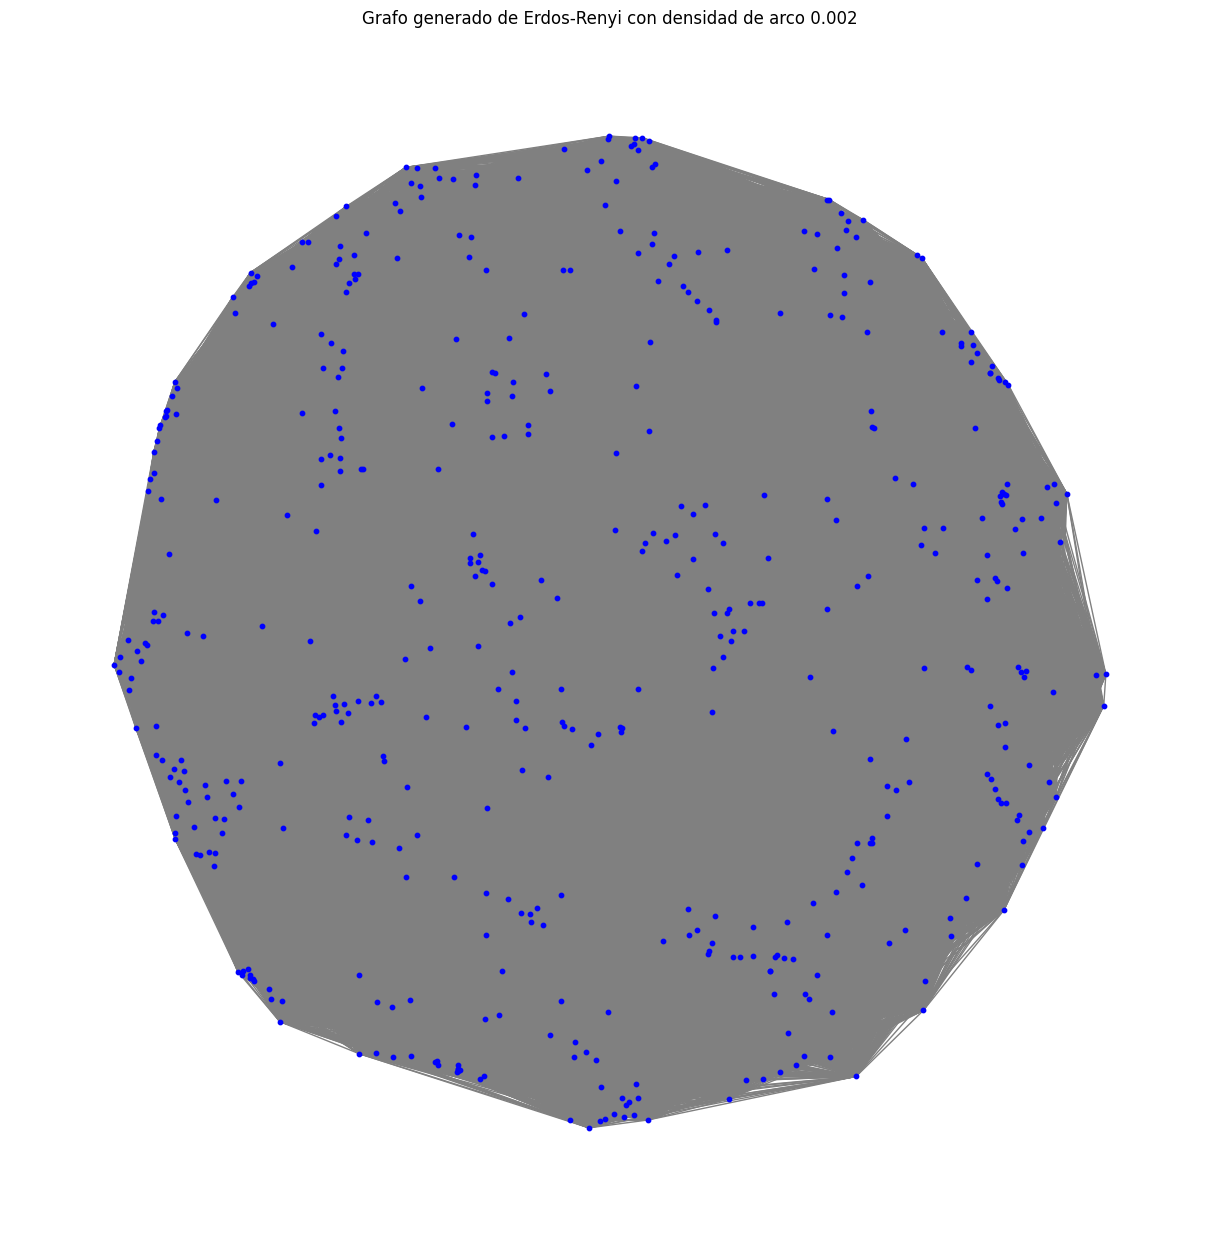

In [3]:
import networkx as nx
import numpy as np
import random as rd
import time
import matplotlib.pyplot as plt

def MCMC_Gibbs(N, p, max_iterations, max_time_seconds=60):
    
    grafo_completo = nx.complete_graph(N)
    
    start_time = time.time()
    iteration = 0
    
    while iteration < max_iterations:
        
        if time.time() - start_time > max_time_seconds:
            print("Tiempo máximo alcanzado, deteniendo la ejecución.")
            break
        
        # Elijo dos vértices al azar
        i, j = rd.sample(range(N), 2)
        
        # Tiro la moneda con probabilidad p
        if np.random.rand() < p:
            if not grafo_completo.has_edge(i, j):
                # Si no hay arista entre i y j, añadirla
                grafo_completo.add_edge(i, j)
                print(f"Arista entre {i} y {j} añadida.")
        else:
            if grafo_completo.has_edge(i, j):
                # Si hay arista entre i y j, eliminarla siempre y cuando el grafo siga conexo 
                # Verificar si el grafo sigue conectado después de la eliminación
                grafo_temporal = grafo_completo.copy()
                grafo_temporal.remove_edge(i, j)

                # Aqui ocupe otra funcion mas de la libreria networkx, ya que no me salió con los codigos que habia implementado anteriormente. 
                
                if nx.is_connected(grafo_temporal):
                    grafo_completo.remove_edge(i, j)
                    print(f"Arista entre {i} y {j} eliminada.")
                else:
                    print(f"No se eliminó la arista entre {i} y {j} para mantener el grafo conectado.")
        
        iteration += 1
    
    # ImprimO la matriz de adyacencia final
    adjacency_matrix = nx.adjacency_matrix(grafo_completo).todense()
    print("Matriz de adyacencia final:\n", adjacency_matrix)
    return grafo_completo

N = 500
p = 0.002
max_iterations = 1000  # Número máximo de iteraciones
max_time_seconds = 60  # Tiempo máximo en segundos

Nuevo_graph = MCMC_Gibbs(N, p, max_iterations, max_time_seconds)

# Graficar el grafo final
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(Nuevo_graph)
nx.draw(Nuevo_graph, pos, node_size=10, node_color='blue', edge_color='gray', with_labels=False)
plt.title("Grafo generado de Erdos-Renyi con densidad de arco 0.002")
plt.show()

Como se ve **claramente** en la imagen es un grafo conexo de 500 vertices. (No se ve nada), (Pronto todo acabará).

Probaré con un numero mas pequeño de vertices

Arista entre 22 y 6 eliminada.
Arista entre 1 y 14 eliminada.
Arista entre 7 y 9 eliminada.
Arista entre 14 y 18 eliminada.
Arista entre 13 y 6 eliminada.
Arista entre 28 y 21 eliminada.
Arista entre 20 y 11 eliminada.
Arista entre 6 y 29 eliminada.
Arista entre 20 y 9 eliminada.
Arista entre 2 y 1 eliminada.
Arista entre 11 y 15 eliminada.
Arista entre 18 y 26 eliminada.
Arista entre 2 y 5 eliminada.
Arista entre 22 y 23 eliminada.
Arista entre 26 y 27 eliminada.
Arista entre 11 y 5 eliminada.
Arista entre 3 y 22 eliminada.
Arista entre 27 y 12 eliminada.
Arista entre 25 y 9 eliminada.
Arista entre 13 y 23 eliminada.
Arista entre 13 y 24 eliminada.
Arista entre 0 y 6 eliminada.
Arista entre 9 y 2 eliminada.
Arista entre 19 y 1 eliminada.
Arista entre 5 y 27 eliminada.
Arista entre 20 y 16 eliminada.
Arista entre 10 y 11 eliminada.
Arista entre 16 y 27 eliminada.
Arista entre 24 y 29 eliminada.
Arista entre 21 y 7 eliminada.
Arista entre 24 y 8 eliminada.
Arista entre 14 y 19 eliminada

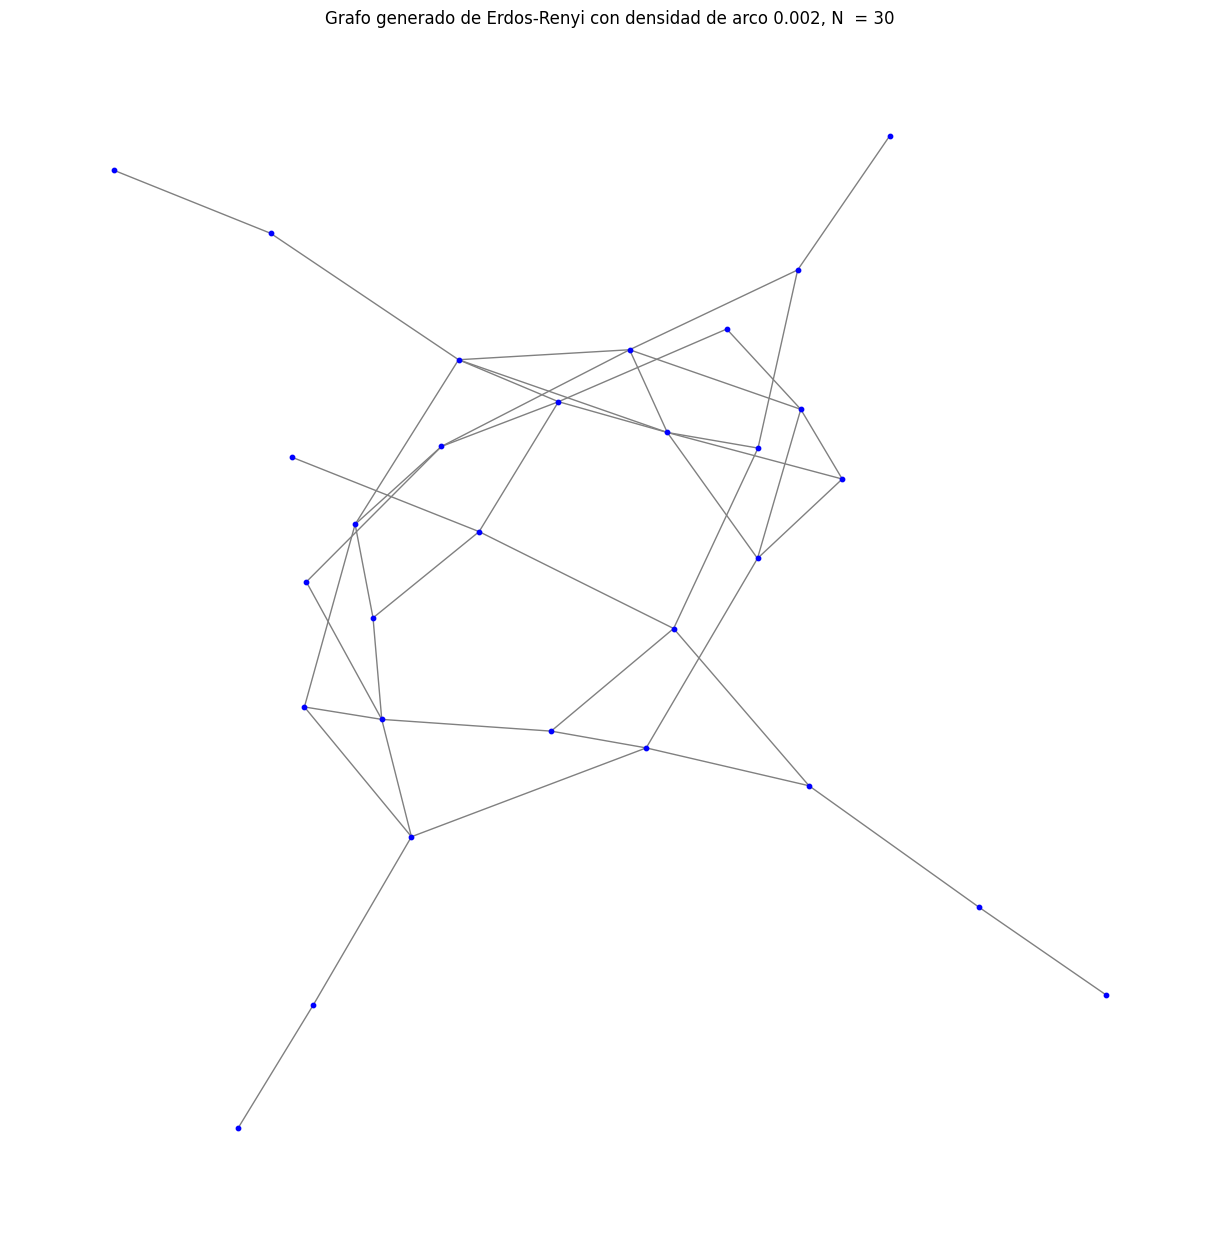

In [25]:
N = 30
p = 0.002
max_iterations = 1000  # Número máximo de iteraciones
max_time_seconds = 60  # Tiempo máximo en segundos

Nuevo_graph = MCMC_Gibbs(N, p, max_iterations, max_time_seconds)

# Graficar el grafo final
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(Nuevo_graph)
nx.draw(Nuevo_graph, pos, node_size=10, node_color='blue', edge_color='gray', with_labels=False)
plt.title("Grafo generado de Erdos-Renyi con densidad de arco 0.002, N  = 30")
plt.show()

## PARTE 5

Corre el algoritmo repetidamente para N = 500 y p = 0.002, y calcula para cada grafo resultante la cantidad de aristas. ¿Cuál es la cantidad promedio? En el modelo normal (sin condicionar la conectividad), se esperaría alrededor de 250 aristas en el grafo para esos parámetros. ¿Cómo crece este número debido a las condiciones impuestas?


In [17]:
import networkx as nx
import numpy as np
import random as rd

def MCMC_Gibbs_variant(N, p, max_iterations):
    # Crear un grafo completo inicialmente
    grafo_completo = nx.complete_graph(N)
    
    iteration = 0
    
    while iteration < max_iterations:
        # dos vértices al azar
        i, j = rd.sample(range(N), 2)
        
        # se  tira unna moneda con probabilidad p
        if np.random.rand() < p:
            if not grafo_completo.has_edge(i, j):
                # Si no hay arista entre i y j, se añade
                grafo_completo.add_edge(i, j)
        else:
            if grafo_completo.has_edge(i, j):
                # Si hay arista entre i y j, intentar eliminarla
                # Verificar si el grafo sigue conectado después de la eliminación
                grafo_temporal = grafo_completo.copy()
                grafo_temporal.remove_edge(i, j)
                
                if nx.is_connected(grafo_temporal):
                    grafo_completo.remove_edge(i, j)
        
        iteration += 1
    
    # Cuento la cantidad de aristas
    cantidad_aristas = grafo_completo.number_of_edges()
    return cantidad_aristas

# Parámetros
N = 500
p = 0.002
max_iterations = 1000  
num_ejecuciones = 10


resultados_aristas = []

for _ in range(num_ejecuciones):
    aristas = MCMC_Gibbs_variant(N, p, max_iterations)
    resultados_aristas.append(aristas)

# Calcular la cantidad promedio de aristas
promedio_aristas = np.mean(resultados_aristas)

print(f"Cantidad promedio de aristas después de {num_ejecuciones} ejecuciones: {promedio_aristas}")

# Comparación con el modelo normal (sin condicionar la conexidad)
esperado_modelo_normal = N * (N - 1) / 2 * p  # Aproximadamente 250 aristas para N = 500 y p = 0.002
print(f"Cantidad esperada de aristas en el modelo normal: {esperado_modelo_normal}")


Cantidad promedio de aristas después de 10 ejecuciones: 123755.4
Cantidad esperada de aristas en el modelo normal: 249.5
